# Import plaintext

In [3]:
from tqdm.notebook import trange
NumTraces = 500

In [4]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../joules-swaes-picochip").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [5]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))

500
16


# Import key

In [6]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (1):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)
print(len(key_array))
print(len(key_array[0]))

1
16


# Import traces

In [7]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../joules-swaes-picochip/report_900samples/*.data"  #### edit here
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                strx.append(row[-2])
                stry.append(row[-1])
            if a == 899:  #### edit here, crop the extra points 
                break
                
for i in range (len(stry)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))

500
900


Text(0.5, 1.0, 'SWAES PICO JOULES 200samples Traces Plot')

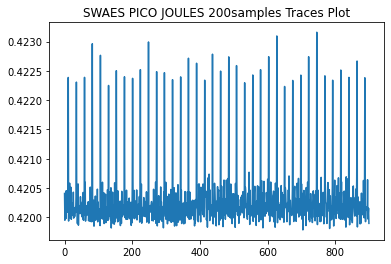

In [8]:
plt.plot(trace_array_y[0])
plt.title('SWAES PICO JOULES 200samples Traces Plot')
#plt.savefig('joules_swaes_200samples_trace.jpg',dpi=100) # save jpg/png

In [9]:
trace_array_y = np.array(trace_array_y)
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[0]))

500
1
500
900


In [10]:
key_array[0]

array([240, 222, 188, 154, 120,  86,  52,  18, 239, 205, 171, 137, 103,
        69,  35,   1], dtype=uint8)

# SBox

In [11]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [16]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = [0xf0, 0xde, 0xbc, 0x9a, 0x78, 0x56, 0x34, 0x12, 0xef, 0xcd, 0xab, 0x89, 0x67, 0x45, 0x23, 0x01]

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
            #st1 = pt_array[tnum][bnum] ^ kguess
            #st2 = sbox[st1]
            #hyp[tnum] = st1 ^ st2

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely F0 (actual F0)
 Top 5 guesses: 
   F0 - Diff = 0.608253
   00 - Diff = 0.362217
   1B - Diff = 0.327770
   74 - Diff = 0.321990
   06 - Diff = 0.317971




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely DE (actual DE)
 Top 5 guesses: 
   DE - Diff = 0.720370
   1A - Diff = 0.368826
   96 - Diff = 0.331284
   64 - Diff = 0.325918
   6A - Diff = 0.318145




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.964777
   5E - Diff = 0.325531
   80 - Diff = 0.310318
   2E - Diff = 0.291982
   D0 - Diff = 0.284106




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 9A (actual 9A)
 Top 5 guesses: 
   9A - Diff = 0.710900
   4A - Diff = 0.342835
   75 - Diff = 0.339389
   AA - Diff = 0.321425
   30 - Diff = 0.316138




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 78 (actual 78)
 Top 5 guesses: 
   78 - Diff = 0.988867
   47 - Diff = 0.347303
   8C - Diff = 0.346330
   FC - Diff = 0.302164
   03 - Diff = 0.296463




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 56 (actual 56)
 Top 5 guesses: 
   56 - Diff = 0.712987
   C4 - Diff = 0.351529
   1F - Diff = 0.342566
   EB - Diff = 0.321690
   E2 - Diff = 0.304682




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 34 (actual 34)
 Top 5 guesses: 
   34 - Diff = 0.890302
   29 - Diff = 0.326144
   74 - Diff = 0.322273
   68 - Diff = 0.307484
   BE - Diff = 0.291488




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 12 (actual 12)
 Top 5 guesses: 
   12 - Diff = 0.971144
   67 - Diff = 0.335423
   80 - Diff = 0.311982
   C6 - Diff = 0.305292
   83 - Diff = 0.286034




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely EF (actual EF)
 Top 5 guesses: 
   EF - Diff = 0.770617
   19 - Diff = 0.316398
   3F - Diff = 0.314071
   C0 - Diff = 0.306438
   B0 - Diff = 0.295610




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely CD (actual CD)
 Top 5 guesses: 
   CD - Diff = 0.956888
   B8 - Diff = 0.312452
   7D - Diff = 0.301215
   C2 - Diff = 0.290228
   98 - Diff = 0.286977




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AB (actual AB)
 Top 5 guesses: 
   AB - Diff = 0.967299
   82 - Diff = 0.327410
   AE - Diff = 0.283808
   F8 - Diff = 0.276484
   04 - Diff = 0.276061




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 89 (actual 89)
 Top 5 guesses: 
   89 - Diff = 0.708510
   A5 - Diff = 0.312937
   DF - Diff = 0.295037
   B6 - Diff = 0.289129
   BD - Diff = 0.286463




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 67 (actual 67)
 Top 5 guesses: 
   67 - Diff = 0.903235
   B2 - Diff = 0.380814
   F2 - Diff = 0.352332
   99 - Diff = 0.346619
   F5 - Diff = 0.341662




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 45 (actual 45)
 Top 5 guesses: 
   45 - Diff = 0.873850
   10 - Diff = 0.358333
   EF - Diff = 0.341507
   61 - Diff = 0.329595
   CA - Diff = 0.307281




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 23 (actual 23)
 Top 5 guesses: 
   23 - Diff = 0.876043
   E5 - Diff = 0.346846
   EC - Diff = 0.310149
   77 - Diff = 0.307965
   0D - Diff = 0.293141




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 01 (actual 01)
 Top 5 guesses: 
   01 - Diff = 0.857628
   1C - Diff = 0.332134
   D5 - Diff = 0.302154
   34 - Diff = 0.298486
   76 - Diff = 0.291691




# How Many Traces Needed for Method 1

In [12]:
traces_enc_full = trace_array_y

In [13]:
len(traces_enc_full[0])

900

In [14]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [15]:
x = np.arange(10, 150, 20)
x

array([ 10,  30,  50,  70,  90, 110, 130])

In [16]:
full_cpa_list = []

key_full_guess = []
second_top_key_guess_full = []

how_many_correct_keybytes = []
is_same = 0

full_top_two_max_corr = []

traces_enc = []
pt = []
known_key = key_array[0]

for traces in trange(10, 150, 20): ## edit here
    x = np.arange(10, 150, 20)  ########### edit the x here !!!!!
    
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    second_top_key_guess = []
    
    cpa_list = []
    
    top_two_max_corr = []
    
    for bnum in range(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        
        sorted_args = np.argsort(maxcpa)[::-1]
        #print("Subkey %2x: Top cap is %02f, second  top cpa is %02f"%(bnum, maxcpa[sorted_args[0]], maxcpa[sorted_args[1]]))
        
        top_two_max_corr.append([maxcpa[sorted_args[0]],maxcpa[sorted_args[1]]])
        
        
        key_guess.append(sorted_args[0])
        second_top_key_guess.append(sorted_args[1])

    full_cpa_list.append(cpa_list)
    
    full_top_two_max_corr.append(top_two_max_corr)
    
    key_full_guess.append(key_guess)
    second_top_key_guess_full.append(second_top_key_guess)
    
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")
    

  0%|          | 0/7 [00:00<?, ?it/s]

For 10 traces, correct key byte are  3


For 30 traces, correct key byte are 15


For 50 traces, correct key byte are 16


For 70 traces, correct key byte are 16


For 90 traces, correct key byte are 16


For 110 traces, correct key byte are 16


For 130 traces, correct key byte are 16




# Plot: x(100-1000), y(correlation value), parameter a/ key byte, b/# of traces

In [17]:
print(len(full_cpa_list))
print(len(full_cpa_list[0]))
print(len(full_cpa_list[0][0]))
print(len(full_cpa_list[0][0][0]))

7
16
256
900


In [18]:
correct_full_list = []
for subset in range (len(full_cpa_list)):
    correct_16_subbyte_list = []
    for subkey in range (len(full_cpa_list[0])):
        max_correct = [] 
        for guess in range (len(full_cpa_list[0][0])):
            if (guess == known_key[subkey]):
                corr = abs(full_cpa_list[subset][subkey][guess])
                ymax = corr.max()
                max_correct.append(ymax)
        correct_16_subbyte_list.append(max_correct)
    correct_full_list.append(correct_16_subbyte_list)

In [19]:
print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))

7
16
1


In [20]:
corr_subkey = []
for subkey in range (len(correct_full_list[0])):
    corr_subset = []
    for subset in range (len(correct_full_list)):
        corr_subset.append(correct_full_list[subset][subkey])
    corr_subkey.append(corr_subset)

In [21]:
print(len(corr_subkey))
print(len(corr_subkey[0]))

16
7


In [27]:
corr_subkey[2]

[[0.8681332368361695],
 [0.7966432148825932],
 [0.8108989487321319],
 [0.7938457708268316],
 [0.7908794817245982],
 [0.7743330059699626],
 [0.7684698451999493]]

In [24]:
np.array(corr_subkey).tofile("900_correct_peak.bin")

<Figure size 432x288 with 0 Axes>

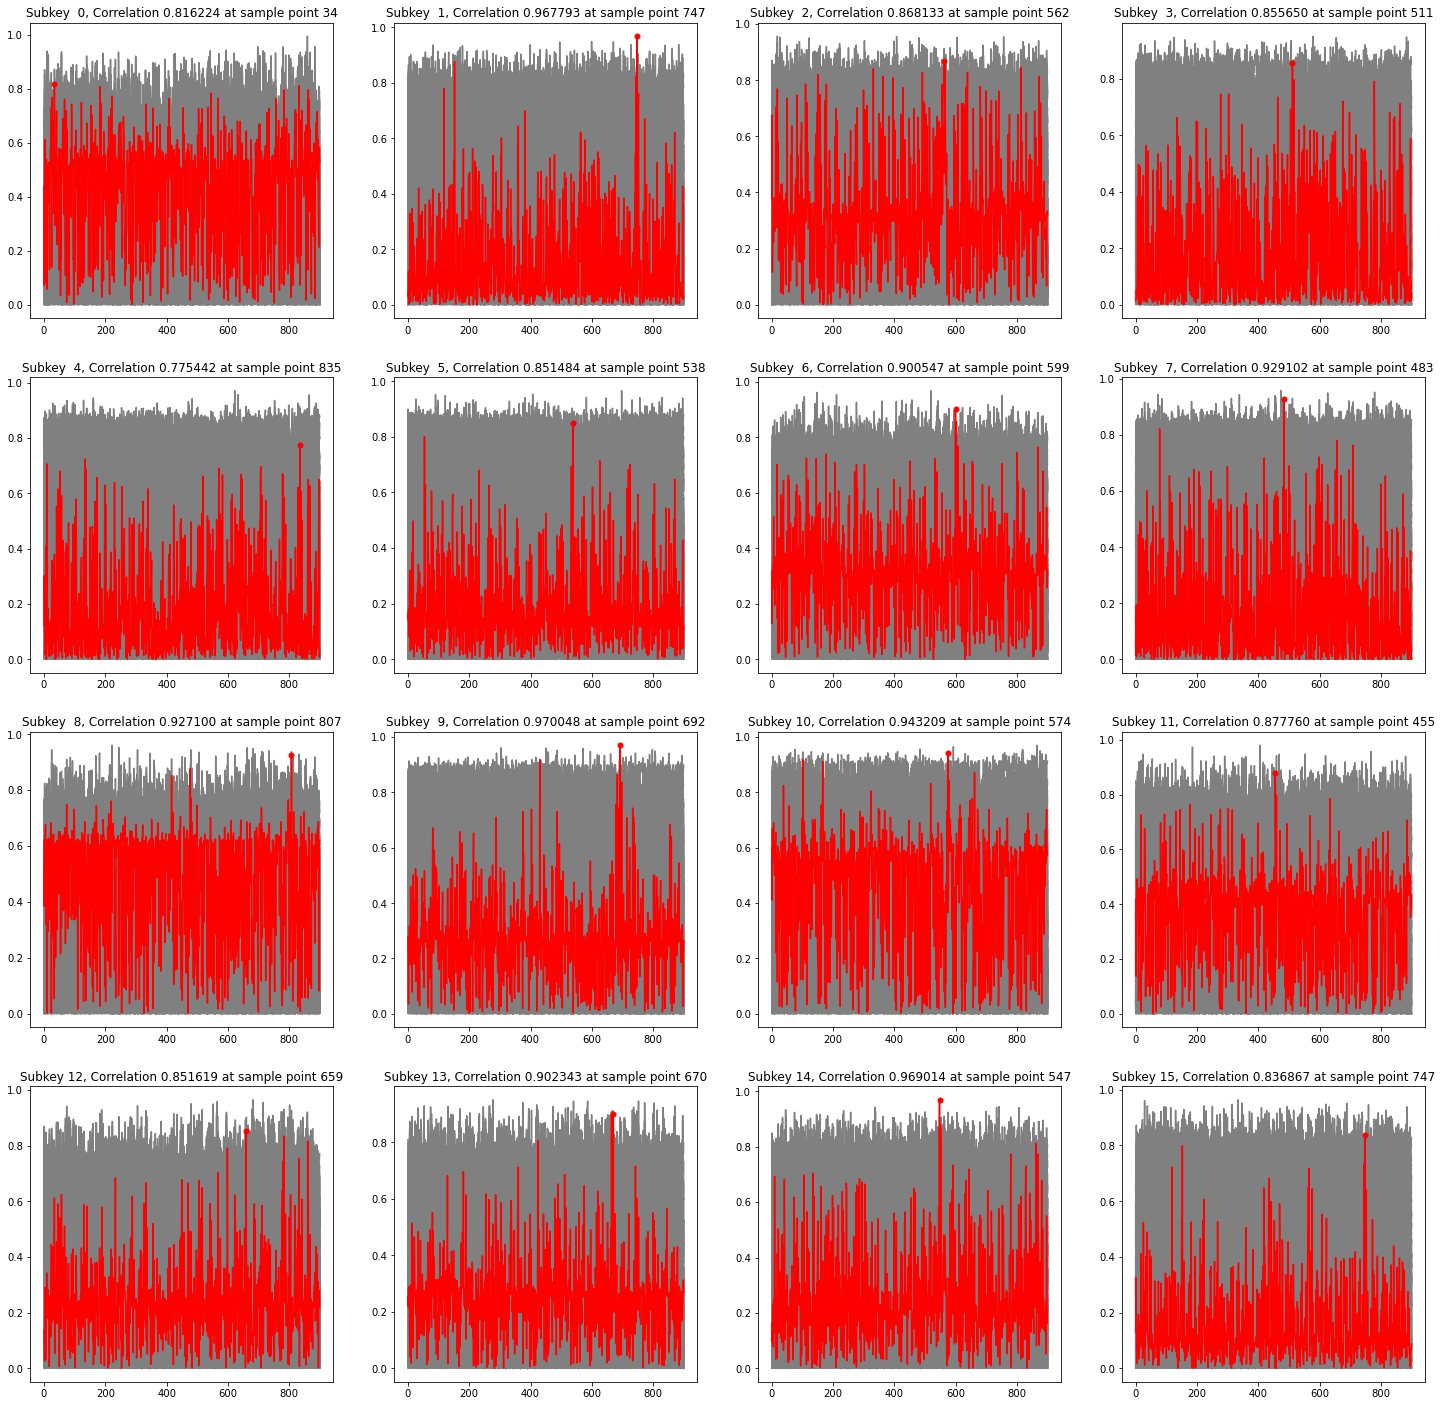

In [25]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
subset = 0
for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subset][subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subset][subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subset][subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
plt.show()

# Add cpa max noises

In [28]:
print(len(full_top_two_max_corr))
print(len(full_top_two_max_corr[0]))
print(len(full_top_two_max_corr[0][0]))

7
16
2


In [29]:
wrong_subset_full = []
for subkey in range (len(full_top_two_max_corr[0])):
    wrong_subset = []
    for subset in range (len(full_top_two_max_corr)):
        wrong_subset.append(full_top_two_max_corr[subset][subkey])
    wrong_subset_full.append(wrong_subset)

In [30]:
print(len(wrong_subset_full))
print(len(wrong_subset_full[0]))
print(len(wrong_subset_full[0][0]))

16
7
2


In [31]:
corr_subkey[15]

[[0.8368669402400452],
 [0.7699283977450058],
 [0.7271657116925611],
 [0.6986731738891799],
 [0.6859805454083218],
 [0.6763674329620499],
 [0.6835937226977249]]

In [32]:
wrong_subset_full[15]

[[0.9638590062488624, 0.9602412503069114],
 [0.7699283977450058, 0.7010291878386135],
 [0.7271657116925611, 0.588790377565507],
 [0.6986731738891799, 0.5380848894055049],
 [0.6859805454083218, 0.48895620668303413],
 [0.6763674329620499, 0.4274429037420072],
 [0.6835937226977249, 0.4398658287322192]]

In [33]:
noise_full = []
for subkey in range (16):
    noise = []
    for subset in range (len(wrong_subset_full[0])):
        if wrong_subset_full[subkey][subset][0] > corr_subkey[subkey][subset]:
            noise.append(wrong_subset_full[subkey][subset][0])
        else:
            noise.append(wrong_subset_full[subkey][subset][1])
    noise_full.append(noise)

In [34]:
noise_full[15]

[0.9638590062488624,
 0.7010291878386135,
 0.588790377565507,
 0.5380848894055049,
 0.48895620668303413,
 0.4274429037420072,
 0.4398658287322192]

In [35]:
print(len(noise_full))
print(len(noise_full[0]))

16
7


In [36]:
np.array(noise_full).tofile("900_noise.bin")

# CPA Number of traces vs. correctly guessed key bytes

Text(0.5, 1.0, 'CPA on JOULES PICO SWAES x00samples\nNumber of traces vs. correctly guessed key bytes')

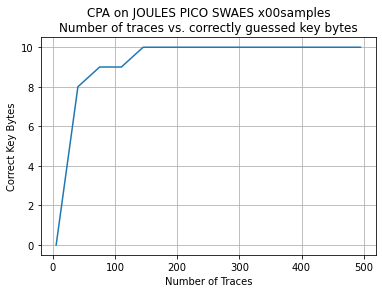

In [130]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# need to make adjustment here for600sample-Copy1 further experienments
# here x is 45 because we run 45 intervals of traces from 5 to 230 with incresing step of 5
### edit below
#x = np.arange(2,45,2) 
### edit above

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
############################################## edit here
plt.title('CPA on JOULES PICO SWAES x00samples\nNumber of traces vs. correctly guessed key bytes')
#plt.savefig('200s_correct_bytes_vs_traces.jpg',dpi=100) # save jpg/png

# Plot for the correlation vs traces 

In [107]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (16):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = abs(full_cpa_list[i][subkey][guess])
                ### edit above -- the list name need to be change for the especific name 
                ymax = corr.max()
                max_correct.append(ymax)
            else:
                corr = abs(full_cpa_list[i][subkey][guess])
                ymax = corr.max()
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

29
16
1
29
16
255


In [110]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (16):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [133]:
peak_corr = []
last = len(x)-1
for i in range (16):
    peak_corr.append(corr_plot_full[i][last][0])
print(peak_corr)
np.array(peak_corr).tofile("100_peak_corr.bin")

[0.10627544035117649, 0.08635160427093272, 0.7962831348622197, 0.3409307351767631, 0.8210427178371767, 0.7630133951583115, 0.09523155838455996, 0.12334561584033191, 0.6333888013763341, 0.8067812270977377, 0.7198598214434337, 0.7629010188511667, 0.11643535203838927, 0.1318044116259465, 0.8150628223429894, 0.7120789872881065]


In [111]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (16):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

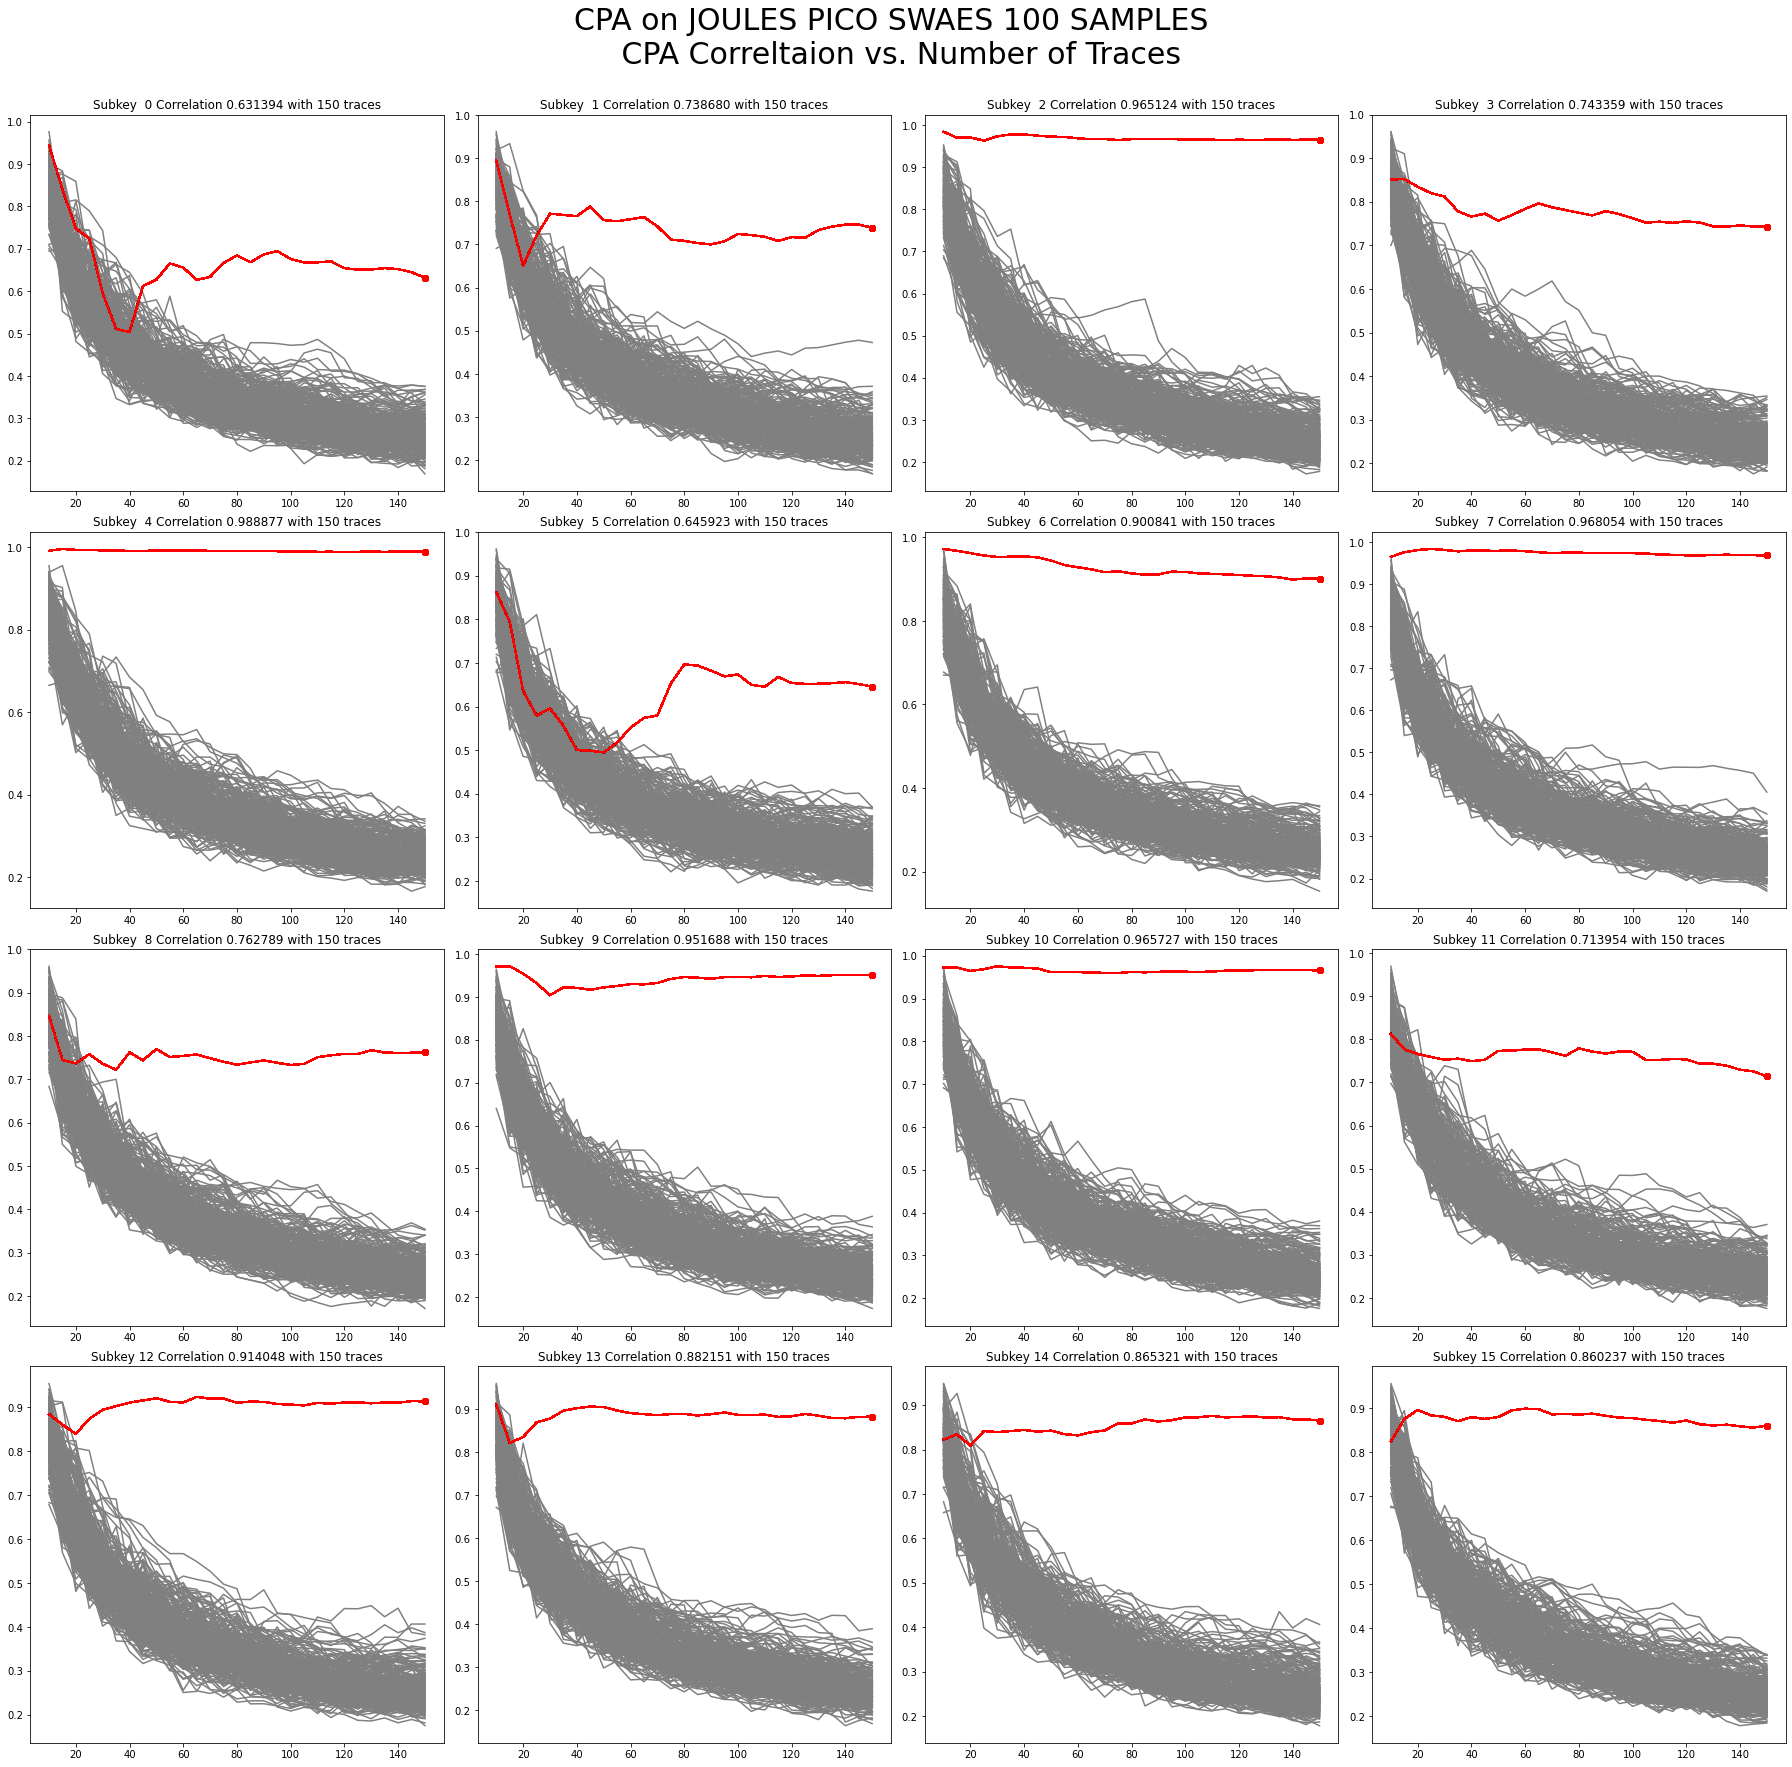

In [112]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    for guess in range (len(else_16[0])):
        pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
        ### edit below, different experienment needs different xaxis
        #x = np.arange(5, 230, 5)  
        ### edit above
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA on JOULES PICO SWAES 100 SAMPLES \n CPA Correltaion vs. Number of Traces', size=30)

#plt.savefig('200s_corr_vs_traces.jpg',dpi=100)  
            
plt.show()

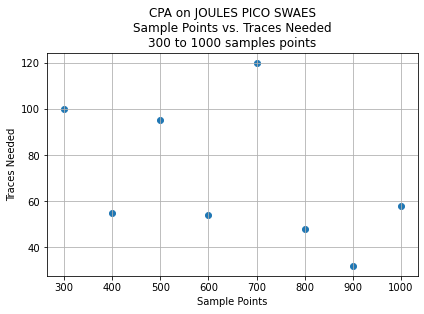

In [44]:
x_axis_sample_points = [300,400,500,600,700,800,900,1000]
y_how_many_traces_needed_to_attack = [100,55,95,54,120,48,32,58]
plt.scatter(x_axis_sample_points, y_how_many_traces_needed_to_attack)
plt.grid()
plt.xlabel('Sample Points')
plt.ylabel('Traces Needed')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
############################################## edit here
plt.title('CPA on JOULES PICO SWAES\nSample Points vs. Traces Needed\n300 to 1000 samples points')
plt.savefig('Sample Points vs. Traces Needed.jpg',dpi=100) # save jpg/png